In [120]:
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np
import esda
import libpysal
import math
import cv2
from skimage.metrics import structural_similarity as ssim

In [121]:

def write_value(value):
    with open('maps.pkl', 'wb') as f:
        pickle.dump(value, f)


def read_value():
    with open('maps.pkl', 'rb') as f:
        val = pickle.load(f)
    return val


In [140]:
def morans_i(data):
    w = libpysal.weights.lat2W(data.shape[0], data.shape[1])
    mi = esda.moran.Moran(data, w)
    return mi.I


def calculate_ssim(img1, img2):
    img1 = np.clip(np.array(img1)*255, 0, 255).astype(np.uint8)
    img2 = np.clip(np.array(img2)*255, 0, 255).astype(np.uint8)
    return ssim(img1, img2)


def calculate_mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


def calculate_psnr(img1, img2):
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [141]:
data = read_value()

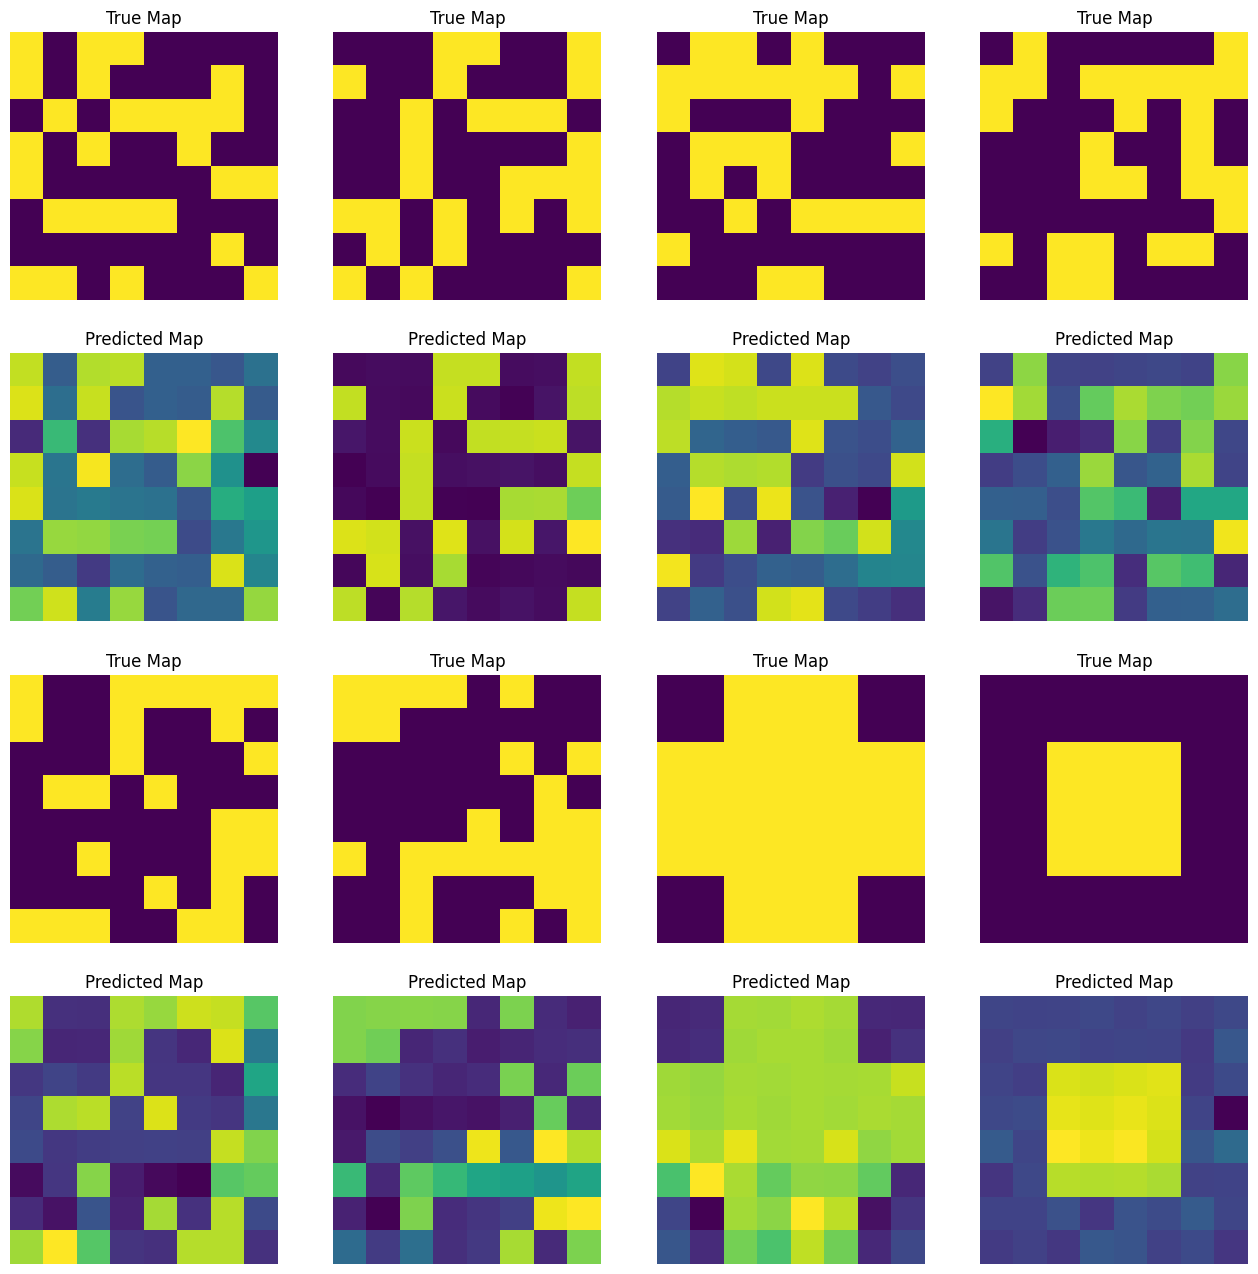

In [172]:
no_regs = [data['no_reg'][i] for i in range(8)]
morans_ind = np.argsort([morans_i(img[1]) for img in no_regs])
no_regs = [no_regs[i] for i in morans_ind]
psnr_no_reg = list(map(lambda imgs: calculate_psnr(imgs[0], imgs[1]), no_regs))
ssim_no_reg = list(map(lambda imgs: calculate_ssim(imgs[0], imgs[1]), no_regs))
mse_no_reg = list(map(lambda imgs: calculate_mse(imgs[0], imgs[1]), no_regs))

fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for ind, (true, pred) in enumerate(no_regs):
    indx,indy = ind//4,ind%4
    ax[2*indx][indy].axis('off')
    ax[2*indx][indy].imshow(true)
    ax[2*indx][indy].set_title('True Map')
    ax[2*indx+1][indy].axis('off')
    ax[2*indx+1][indy].imshow(pred)
    ax[2*indx+1][indy].set_title('Predicted Map')
plt.savefig('plots/no_reg.png', bbox_inches='tight')
plt.show()

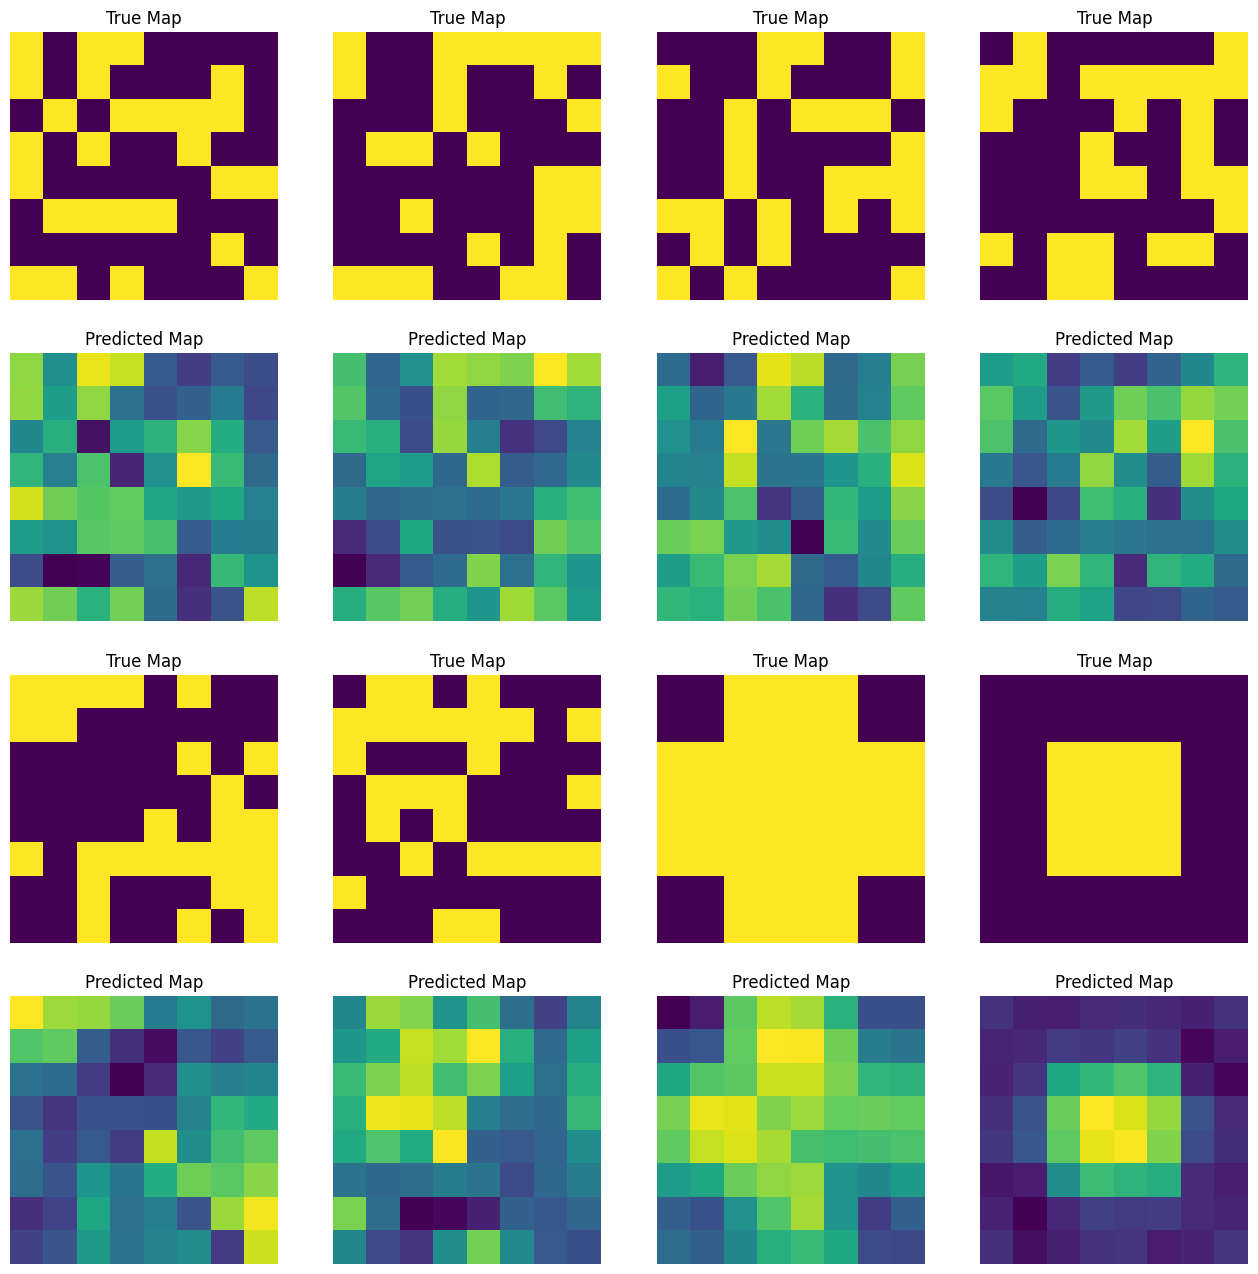

In [167]:
regs = [data['reg'][i] for i in range(8)]
morans_ind = np.argsort([morans_i(img[1]) for img in regs])
regs = [regs[i] for i in morans_ind]
psnr_reg = list(map(lambda imgs: calculate_psnr(imgs[0], imgs[1]), regs))
ssim_reg = list(map(lambda imgs: calculate_ssim(imgs[0], imgs[1]), regs))
mse_reg = list(map(lambda imgs: calculate_mse(imgs[0], imgs[1]), regs))

fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for ind, (true, pred) in enumerate(regs):
    indx,indy = ind//4,ind%4
    ax[2*indx][indy].axis('off')
    ax[2*indx][indy].imshow(true)
    ax[2*indx][indy].set_title('True Map')
    ax[2*indx+1][indy].axis('off')
    ax[2*indx+1][indy].imshow(pred)
    ax[2*indx+1][indy].set_title('Predicted Map')
plt.savefig('plots/reg.png', bbox_inches='tight')
plt.show()

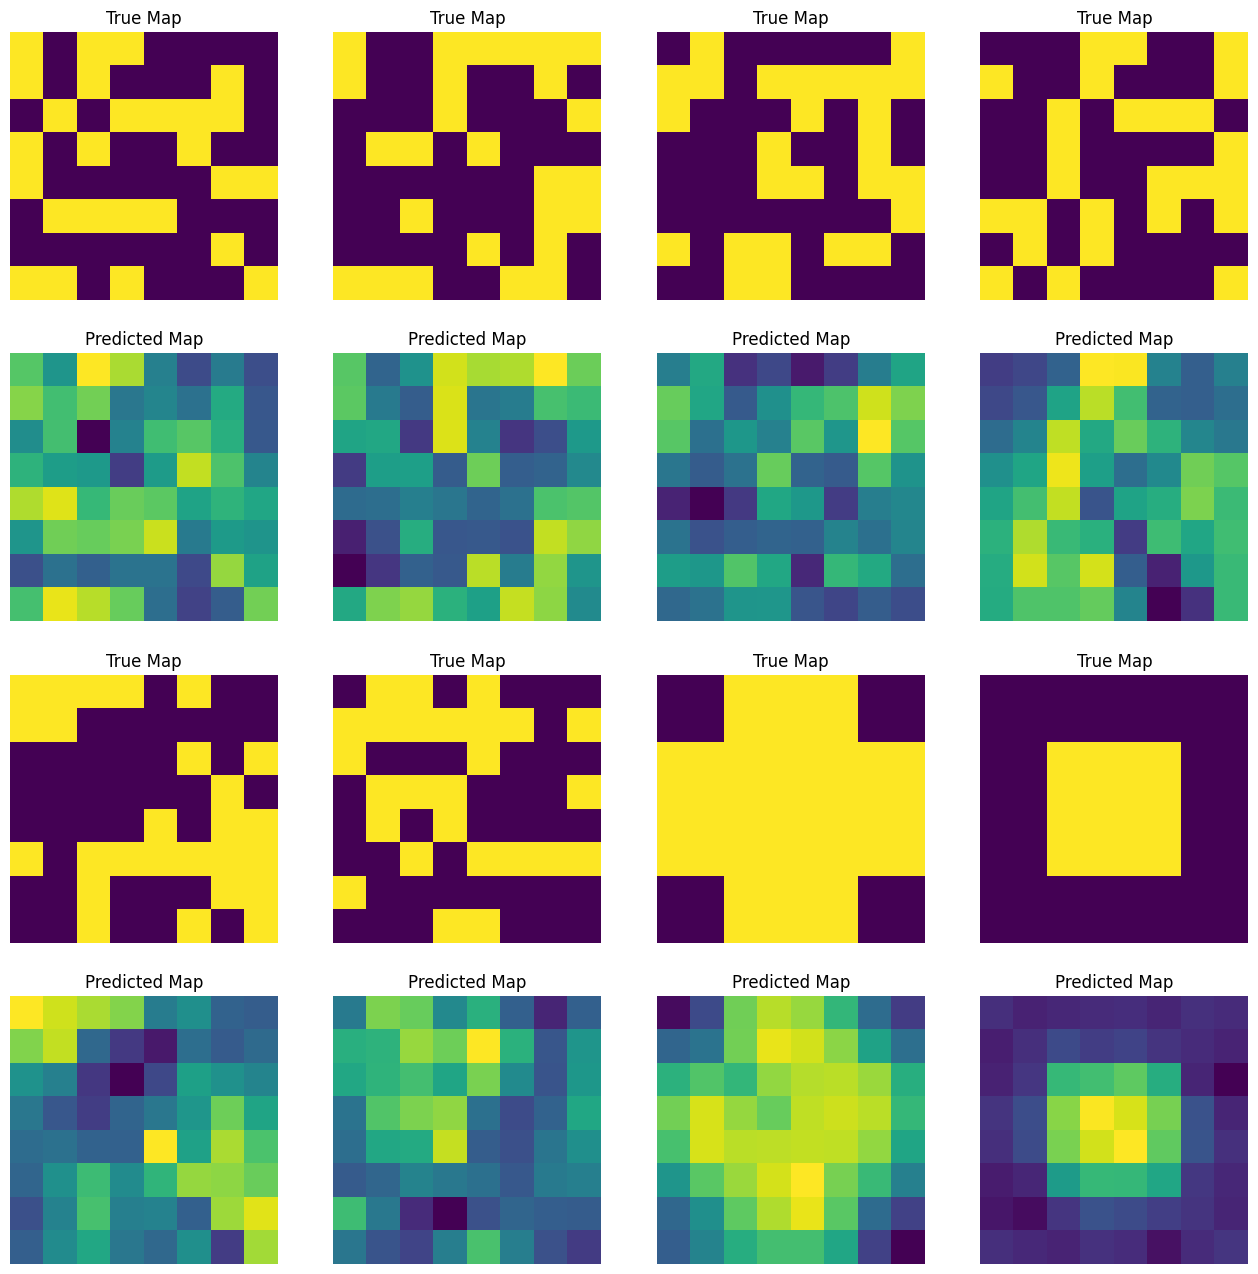

In [173]:
zero_priors = [data['zero_prior'][i] for i in range(8)]
morans_ind = np.argsort([morans_i(img[1]) for img in zero_priors])
zero_priors = [zero_priors[i] for i in morans_ind]
psnr_zero_prior = list(
    map(lambda imgs: calculate_psnr(imgs[0], imgs[1]), zero_priors))
ssim_zero_prior = list(
    map(lambda imgs: calculate_ssim(imgs[0], imgs[1]), zero_priors))
mse_zero_prior = list(
    map(lambda imgs: calculate_mse(imgs[0], imgs[1]), zero_priors))

fig, ax = plt.subplots(4, 4, figsize=(16, 16))
for ind, (true, pred) in enumerate(zero_priors):
    indx,indy = ind//4,ind%4
    ax[2*indx][indy].axis('off')
    ax[2*indx][indy].imshow(true)
    ax[2*indx][indy].set_title('True Map')
    ax[2*indx+1][indy].axis('off')
    ax[2*indx+1][indy].imshow(pred)
    ax[2*indx+1][indy].set_title('Predicted Map')
plt.savefig('plots/zero_prior.png', bbox_inches='tight')
plt.show()

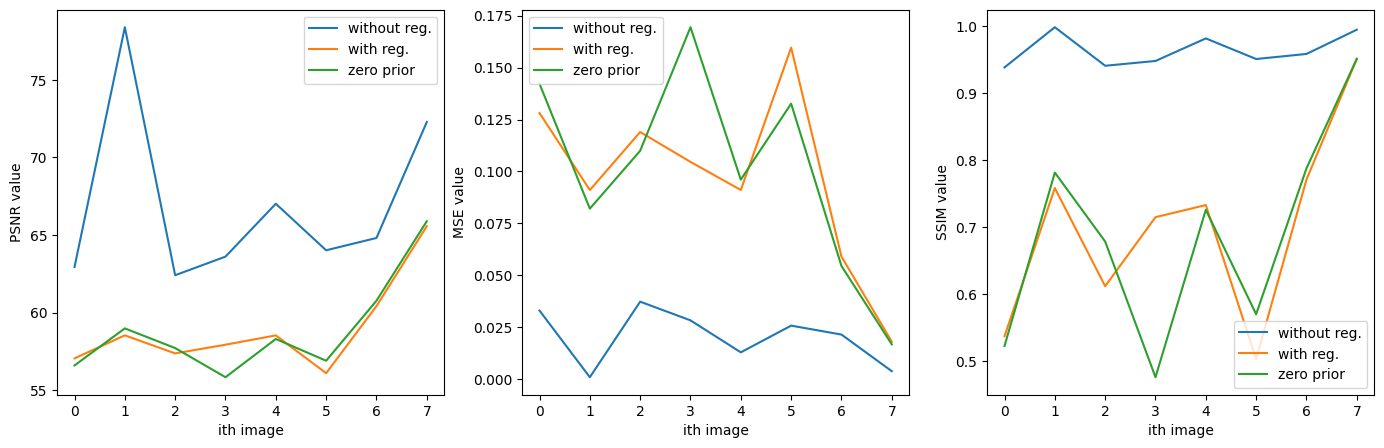

In [178]:
fig,ax = plt.subplots(1,3,figsize=(17,5))
ax[0].plot(psnr_no_reg,label = 'without reg.')
ax[0].plot(psnr_reg,label = 'with reg.')
ax[0].plot(psnr_zero_prior,label='zero prior')
ax[0].set_xlabel('ith image')
ax[0].set_ylabel('PSNR value')
ax[0].legend()

ax[1].plot(mse_no_reg,label = 'without reg.')
ax[1].plot(mse_reg,label = 'with reg.')
ax[1].plot(mse_zero_prior,label='zero prior')
ax[1].set_xlabel('ith image')
ax[1].set_ylabel('MSE value')
ax[1].legend()

ax[2].plot(ssim_no_reg,label = 'without reg.')
ax[2].plot(ssim_reg,label = 'with reg.')
ax[2].plot(ssim_zero_prior,label='zero prior')
ax[2].set_xlabel('ith image')
ax[2].set_ylabel('SSIM value')
ax[2].legend()
plt.savefig('plots/metrics.png', bbox_inches='tight')
plt.show()